In [25]:
library(fpp3)

ARIMA

9.1 -- stationarity and differencing

In [2]:
google_2015 <- gafa_stock |> filter(Symbol == "GOOG", year(Date) == 2015)

In [3]:
head(google_2015)

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GOOG,2015-01-02,526.1147,528.3624,521.2316,521.9377,521.9377,1447600
GOOG,2015-01-05,520.3962,521.4604,510.2520,511.0576,511.0576,2059800
GOOG,2015-01-06,512.1815,513.3500,498.3078,499.2128,499.2128,2899900
GOOG,2015-01-07,504.2252,504.4679,496.9154,498.3575,498.3575,2065100
GOOG,2015-01-08,495.2645,500.7245,488.3128,499.9289,499.9289,3353600
GOOG,2015-01-09,501.9975,502.1566,492.0821,493.4545,493.4545,2069400


In [4]:
options(repr.plot.width = 16, repr.plot.height = 14)

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


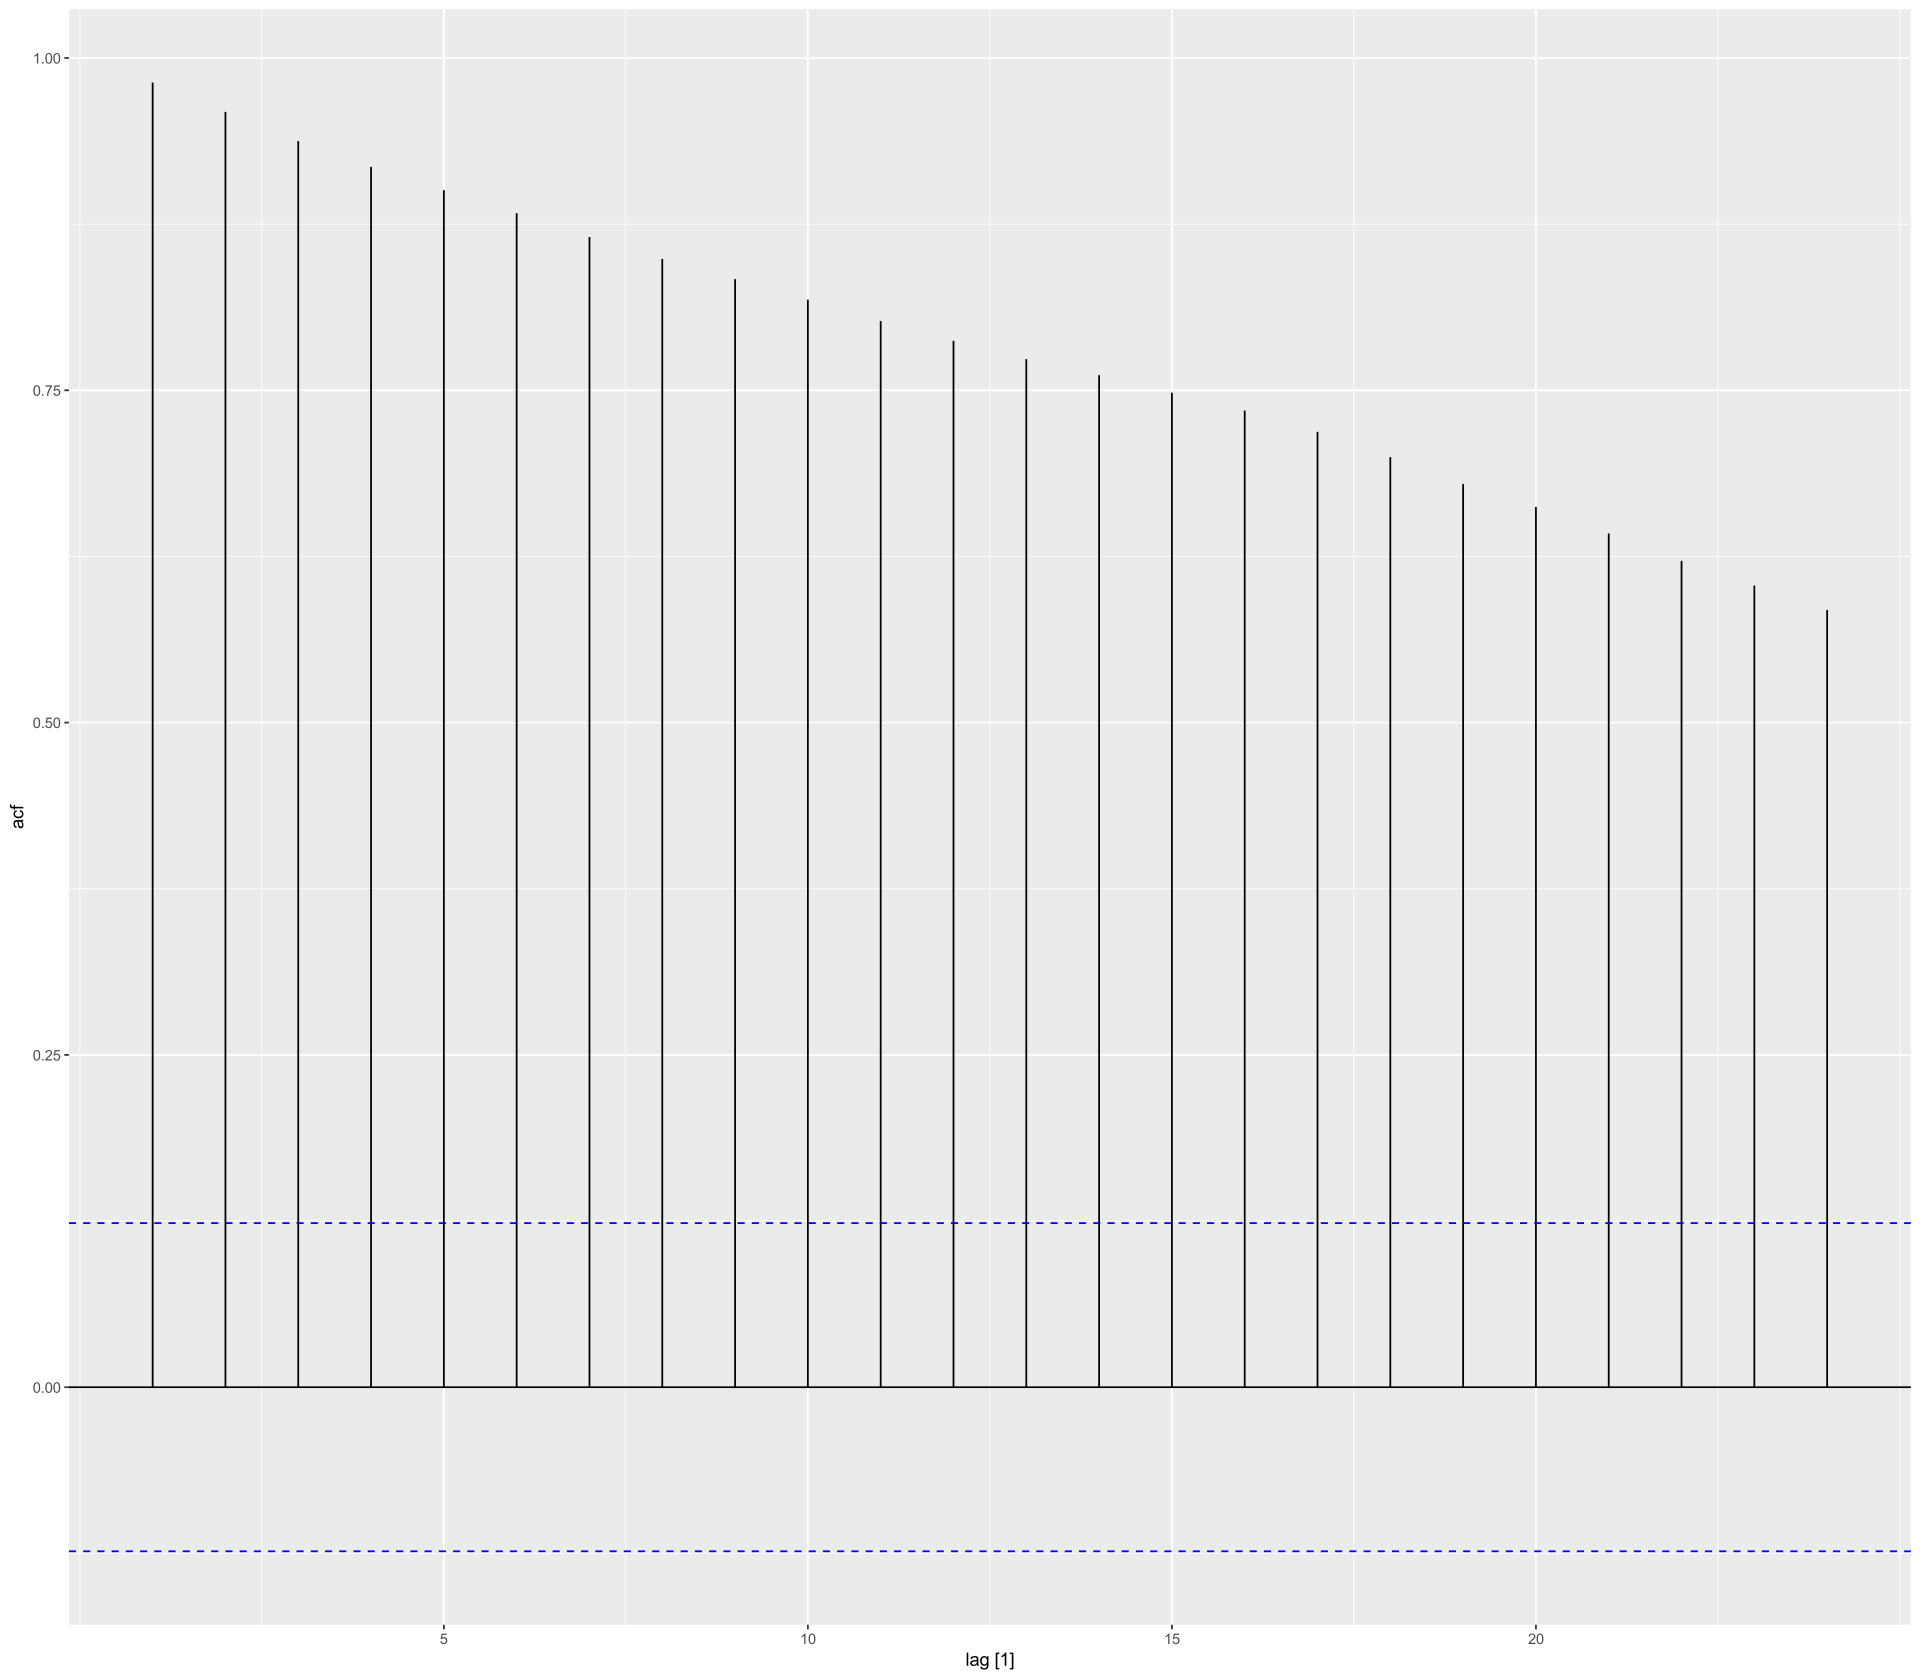

In [5]:
google_2015 |>ACF(Close)|>autoplot()

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


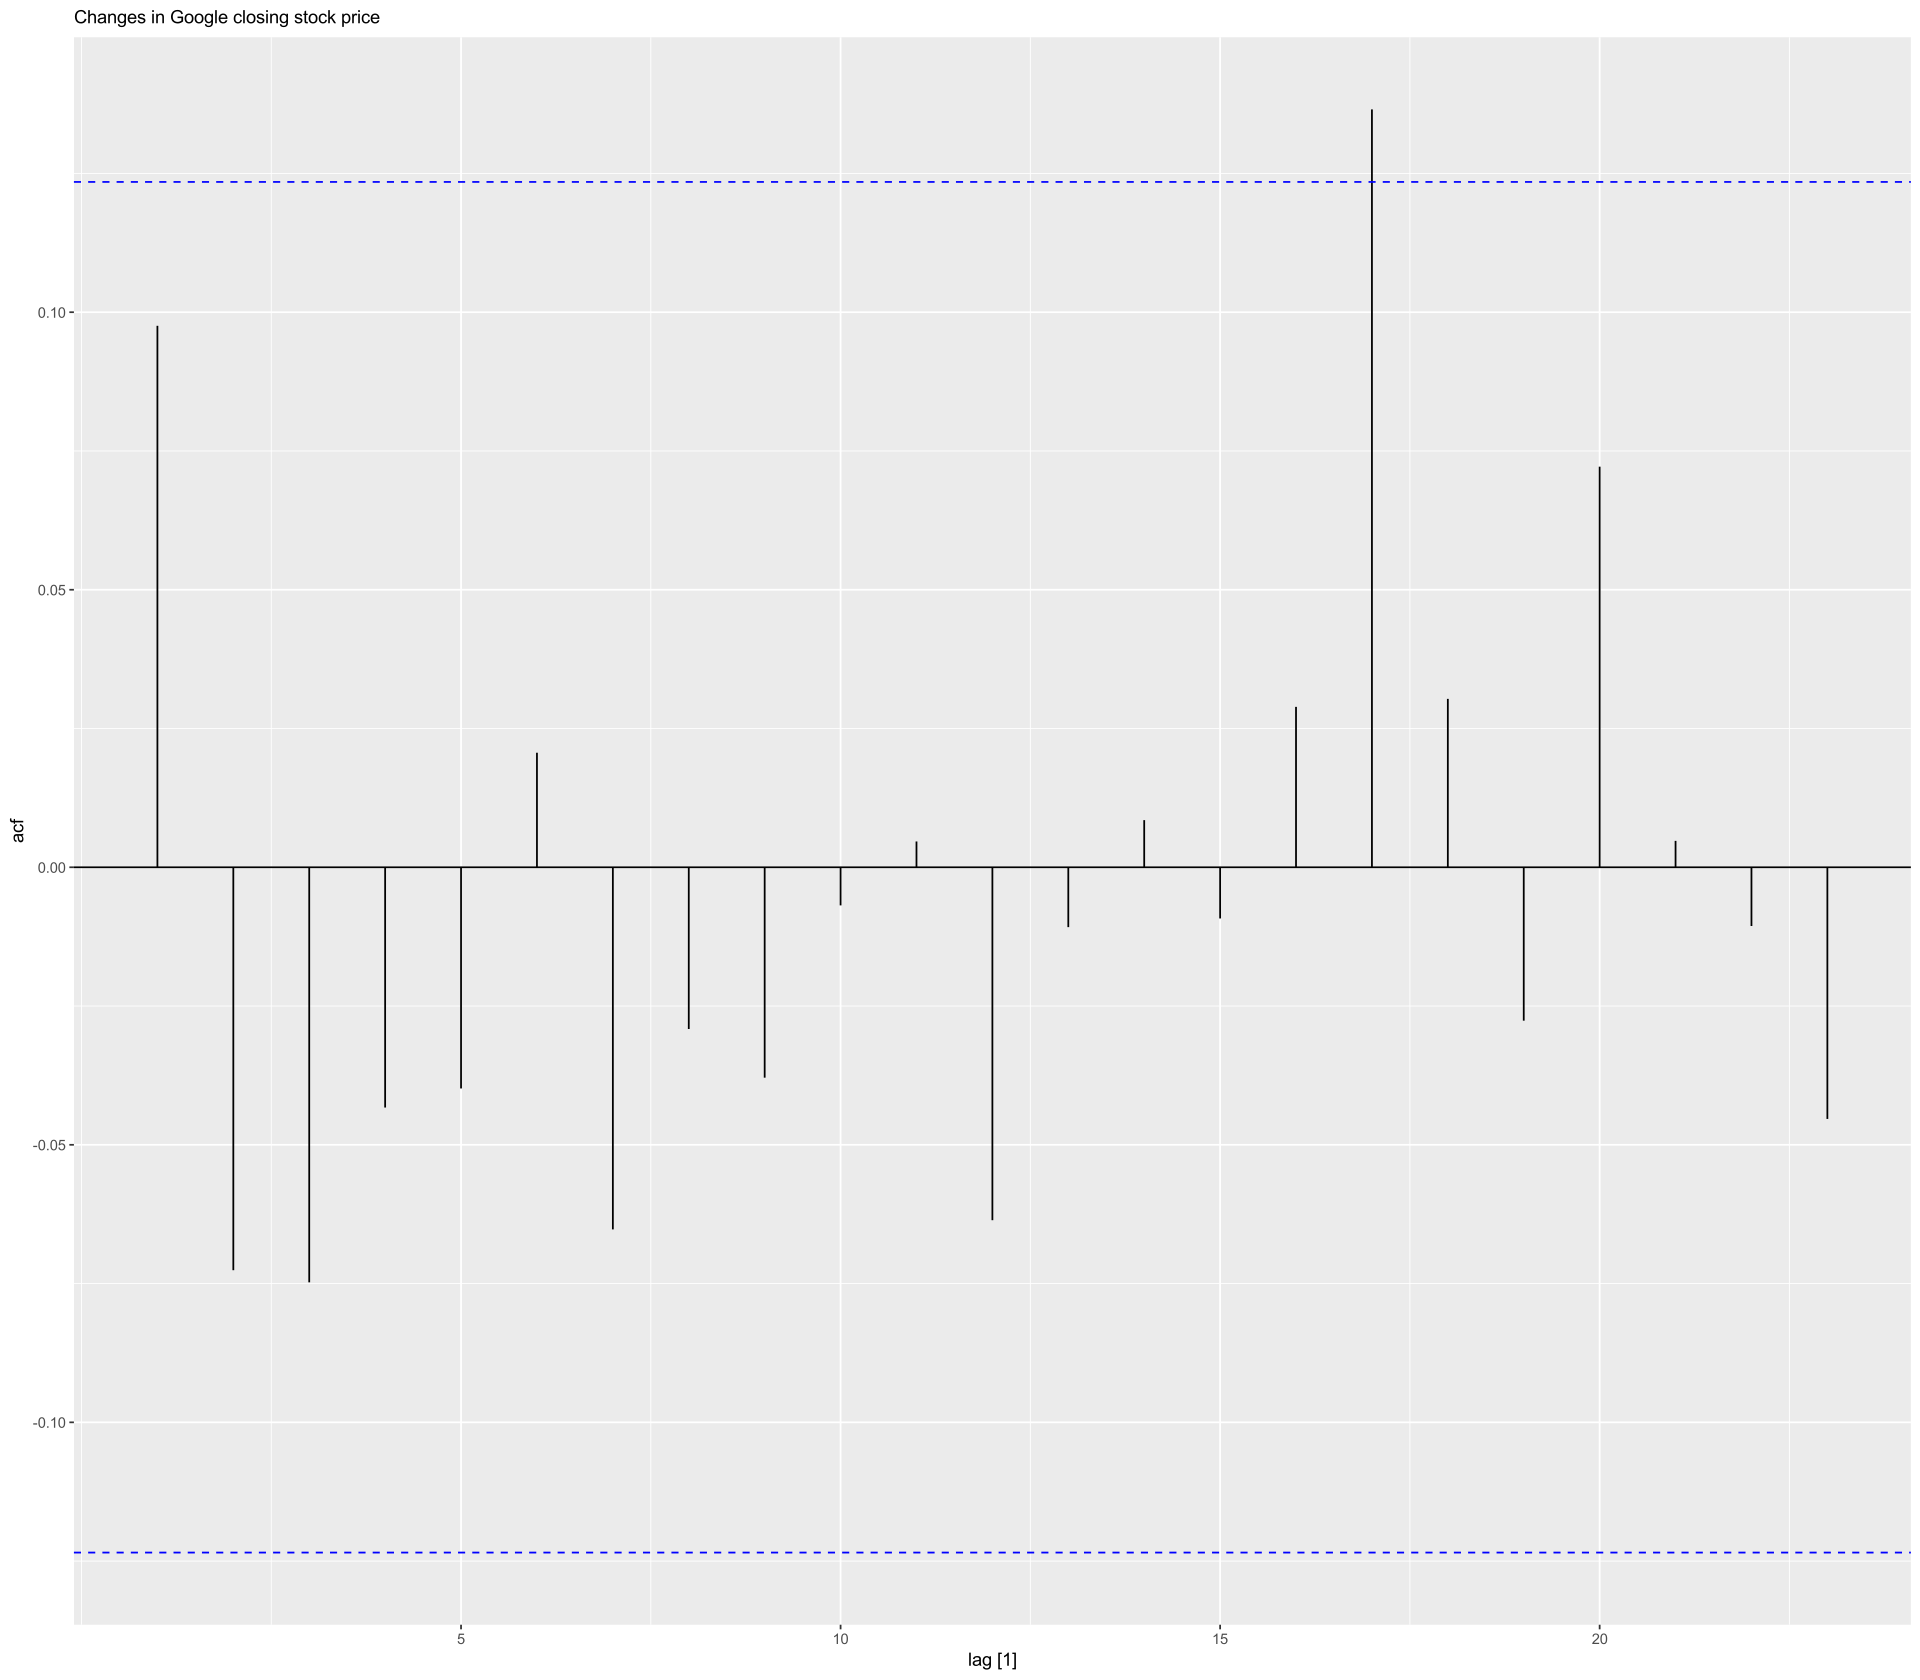

In [6]:
# Now differencing 

google_2015|> ACF(difference(Close)) |> autoplot() + labs(subtitle = "Changes in Google closing stock price")

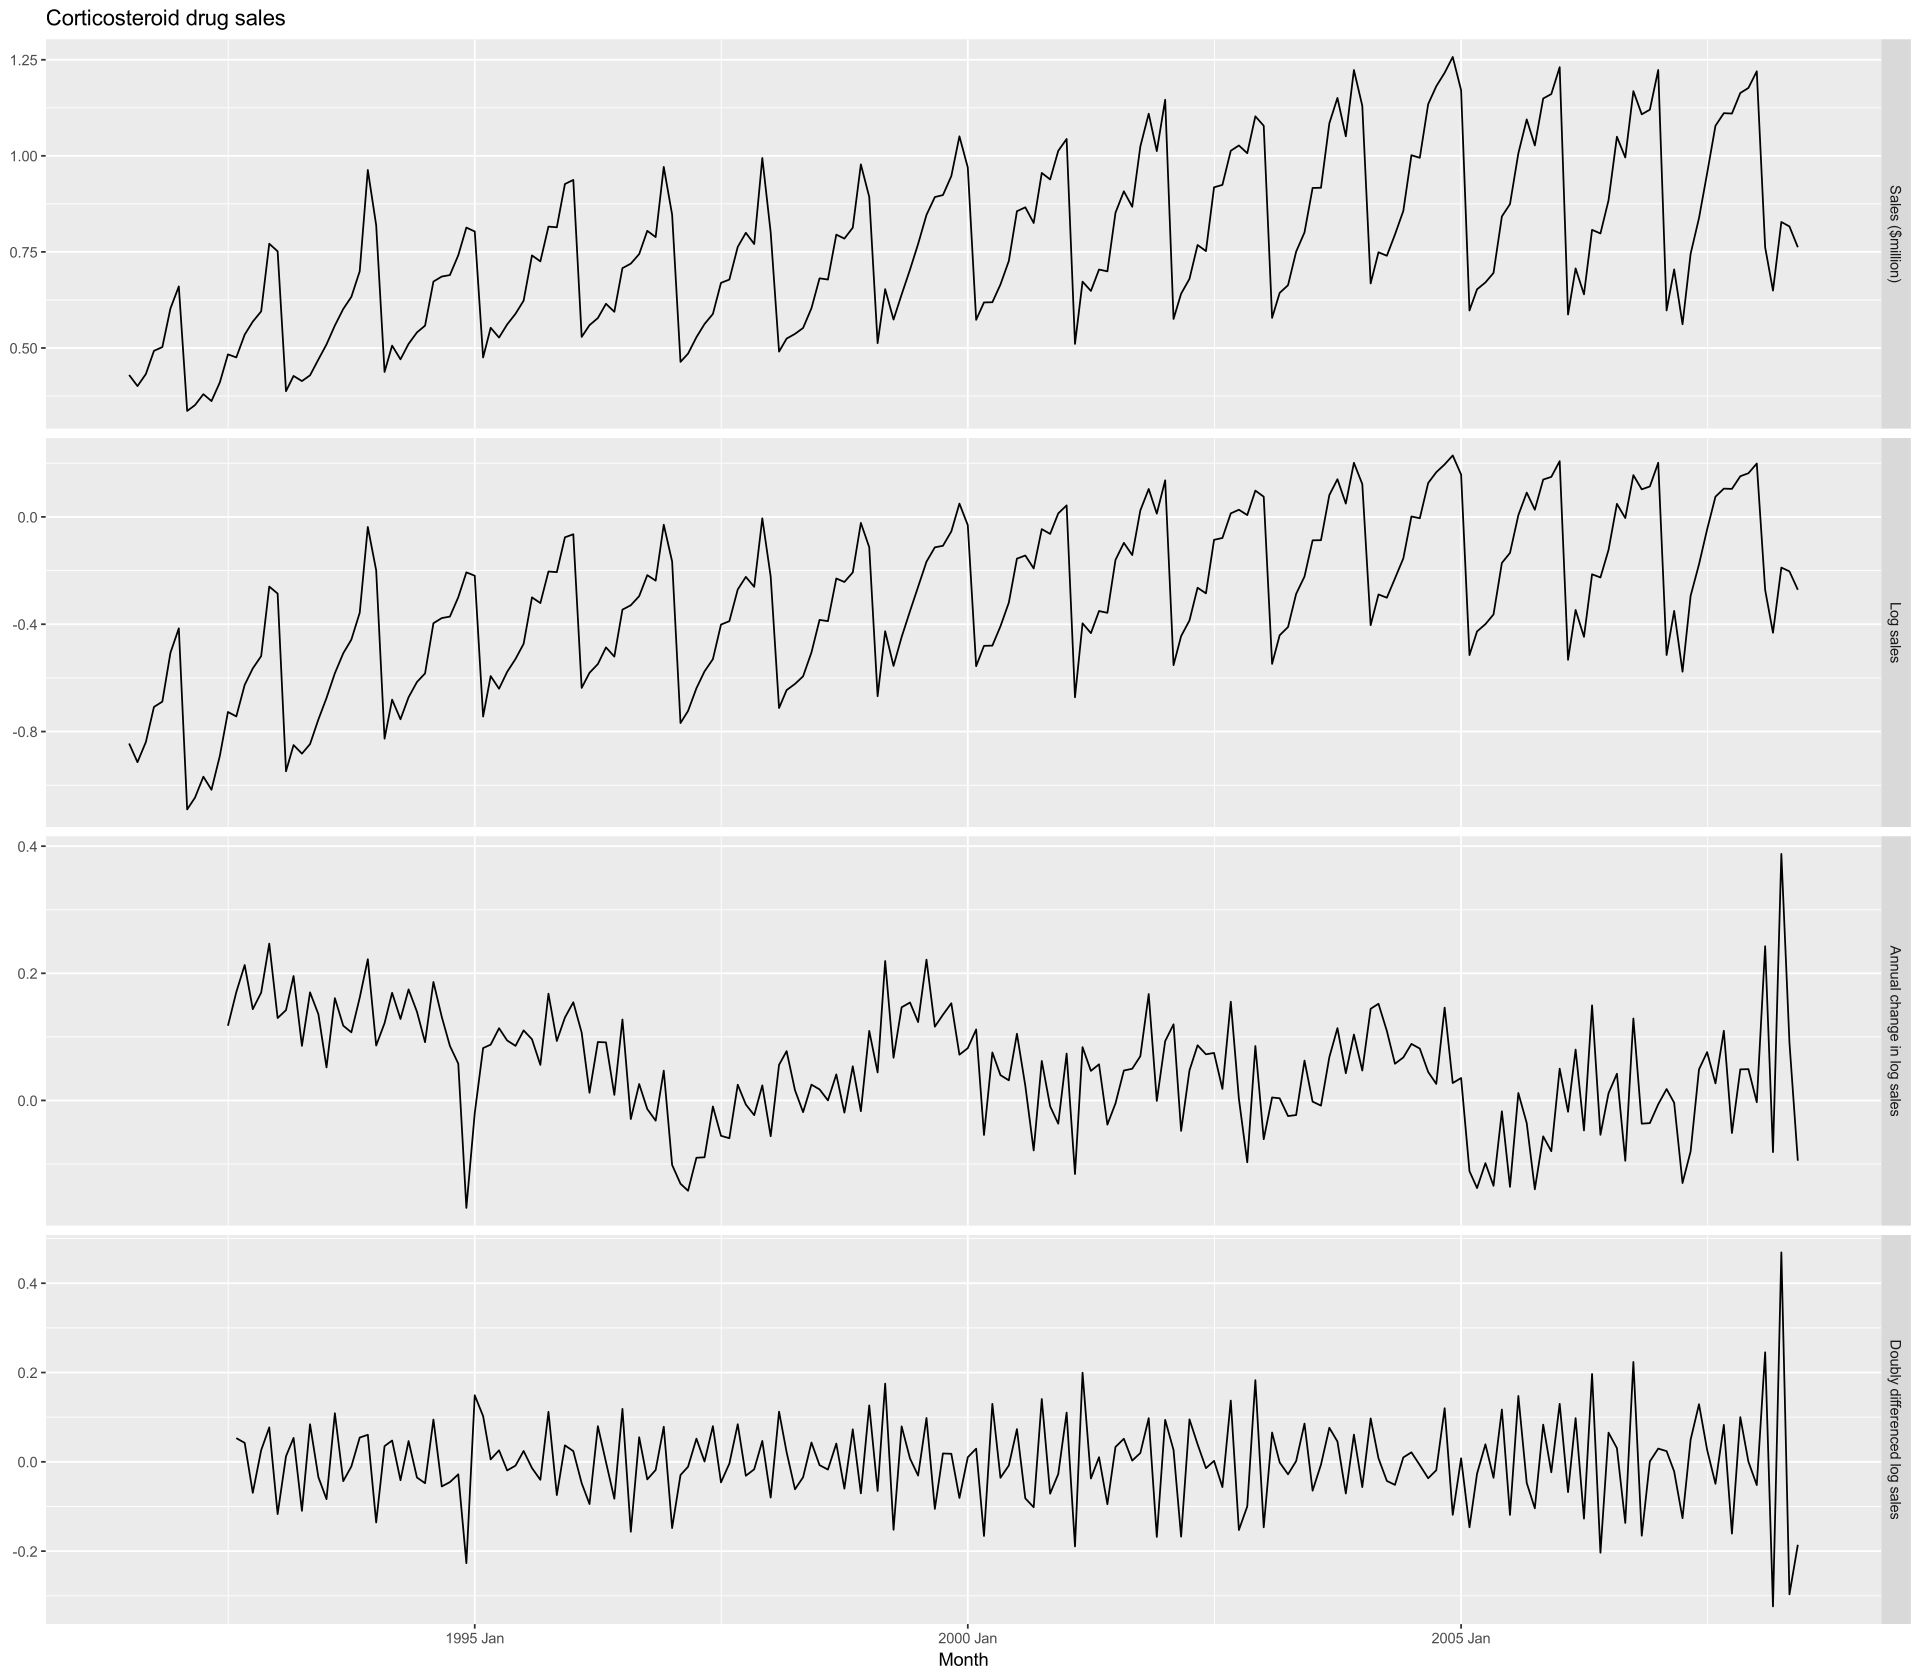

In [7]:
PBS |>
  filter(ATC2 == "H02") |>
  summarise(Cost = sum(Cost)/1e6) |>
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  ) |>
  pivot_longer(-Month, names_to="Type", values_to="Sales") |>
  mutate(
    Type = factor(Type, levels = c(
      "Sales ($million)",
      "Log sales",
      "Annual change in log sales",
      "Doubly differenced log sales"))
  ) |>
  ggplot(aes(x = Month, y = Sales)) +
  geom_line() +
  facet_grid(vars(Type), scales = "free_y") +
  labs(title = "Corticosteroid drug sales", y = NULL)

In [8]:
install.packages("urca", dependencies = TRUE)

Warning message in install.packages("urca", dependencies = TRUE):
“installation of package ‘urca’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [9]:
# Perform certain tests to ascertain the need of differencing 

google_2015|> features(Close, unitroot_kpss)

Warning message:
“1 error encountered for feature 1
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


Symbol
<chr>
GOOG


In [10]:
google_2015 |> features(Close, unitroot_ndiffs)

Warning message:
“1 error encountered for feature 1
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


Symbol
<chr>
GOOG


In [11]:
aus_total_retail <- aus_retail |>
  summarise(Turnover = sum(Turnover))
aus_total_retail |>
  mutate(log_turnover = log(Turnover)) |>
  features(log_turnover, unitroot_nsdiffs)
#> # A tibble: 1 × 1
#>   nsdiffs
#>     <int>
#> 1       1

aus_total_retail |>
  mutate(log_turnover = difference(log(Turnover), 12)) |>
  features(log_turnover, unitroot_ndiffs)
#> # A tibble: 1 × 1
#>   ndiffs
#>    <int>
#> 1      1

nsdiffs
<int>
1


Warning message:
“1 error encountered for feature 1
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


1

9.2 Backshift notation

9.3 Autoregressive models

9.5 Non seasonal ARIMA

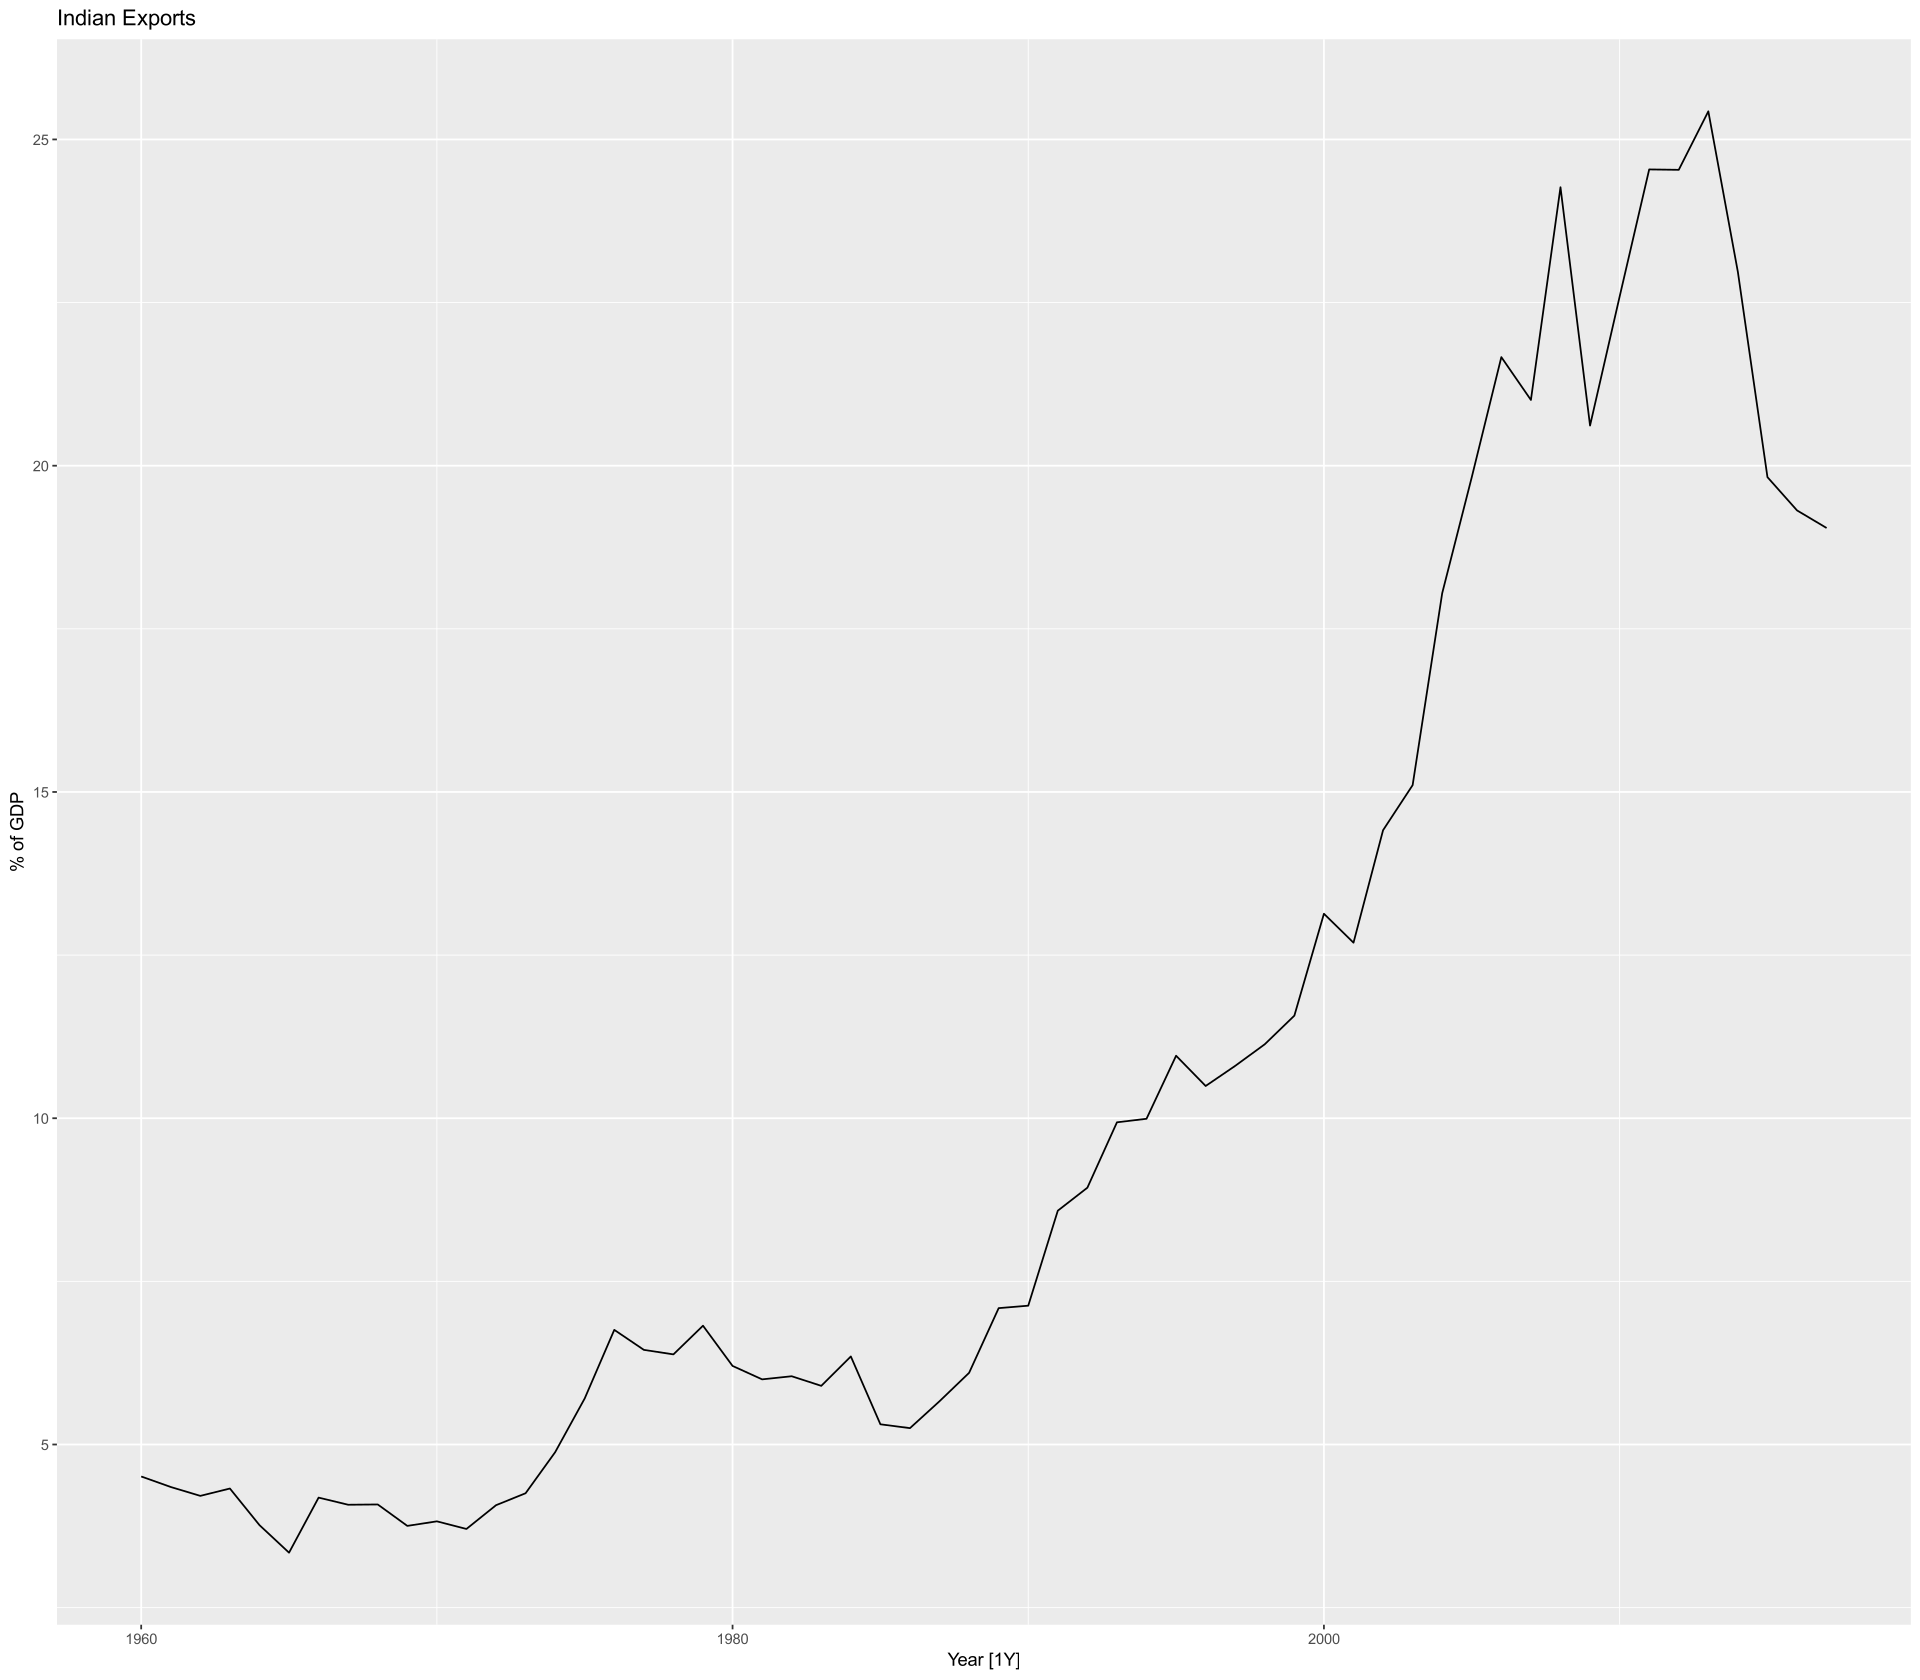

In [12]:
global_economy |>filter(Code == "IND") |> autoplot(Exports) + labs(y  = "% of GDP", title = "Indian Exports")

In [13]:
install.packages("urca", repos = "http://cran.rstudio.com/")

Warning message in install.packages("urca", repos = "http://cran.rstudio.com/"):
“installation of package ‘urca’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
# The following R code selects a seasonal ARIMA model automatically

fit <- global_economy|>filter(Code == "IND")|>model(ARIMA(Exports))

Warning message:
“1 error encountered for ARIMA(Exports)
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


In [15]:
fit

Country,ARIMA(Exports)
<fct>,<model>
India,<NULL model>


Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 10 rows containing missing values (`()`).”


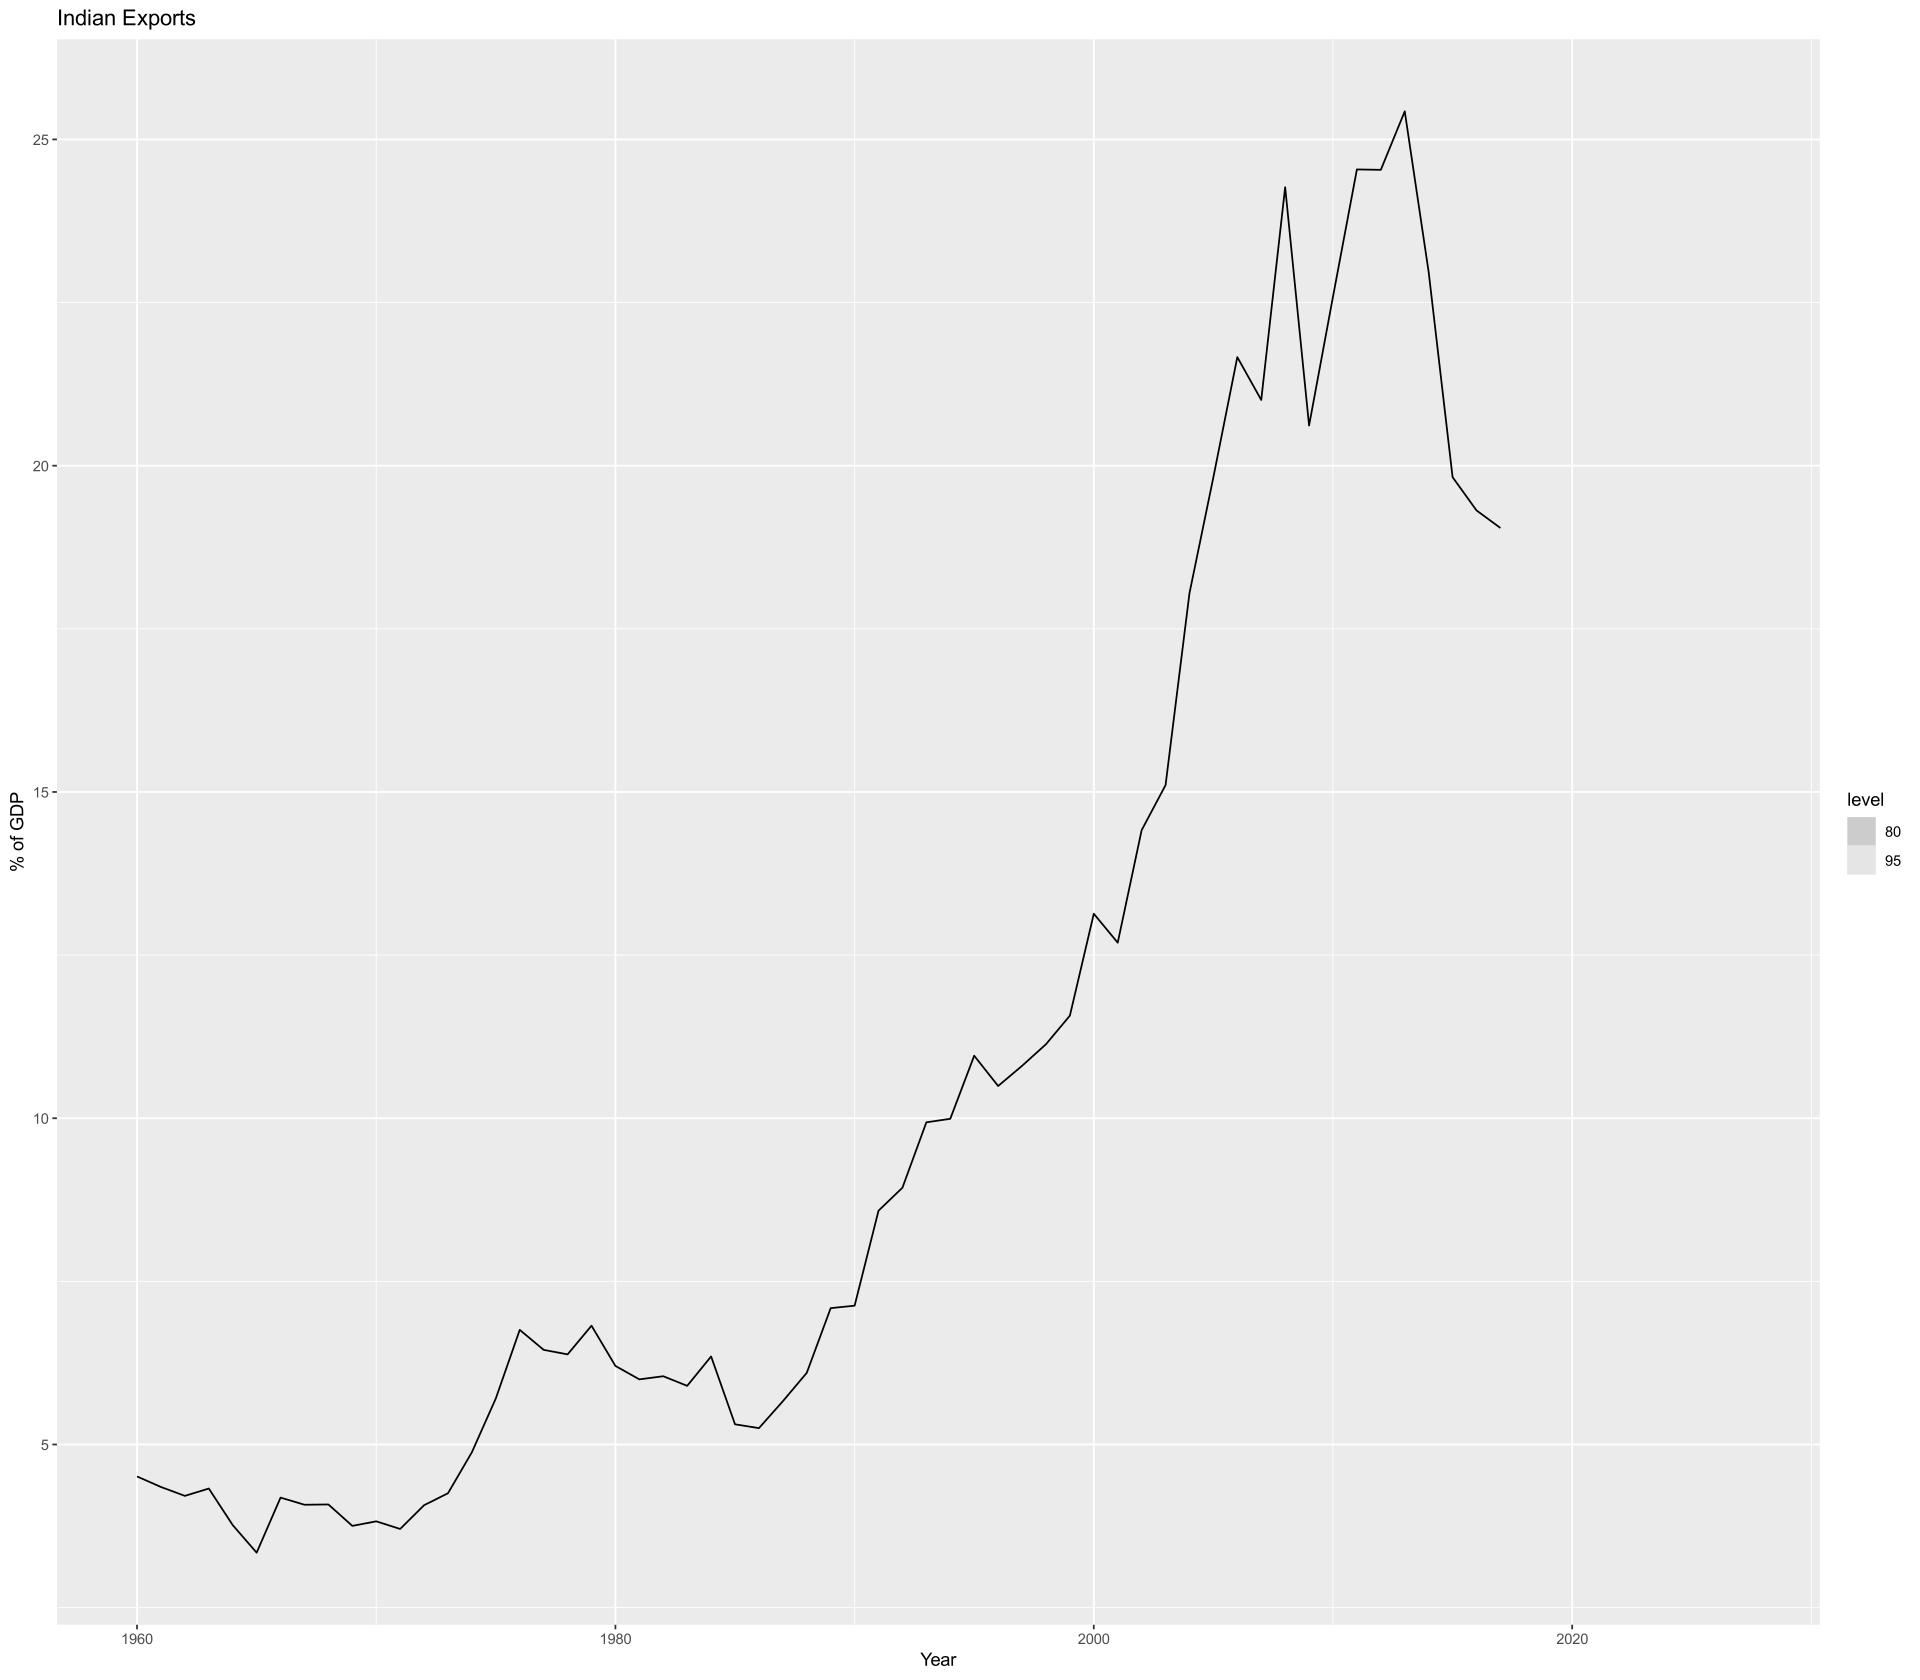

In [16]:
# forecast

fit |>forecast(h=10)|>autoplot(global_economy) + labs(y = "% of GDP", title = "Indian Exports")

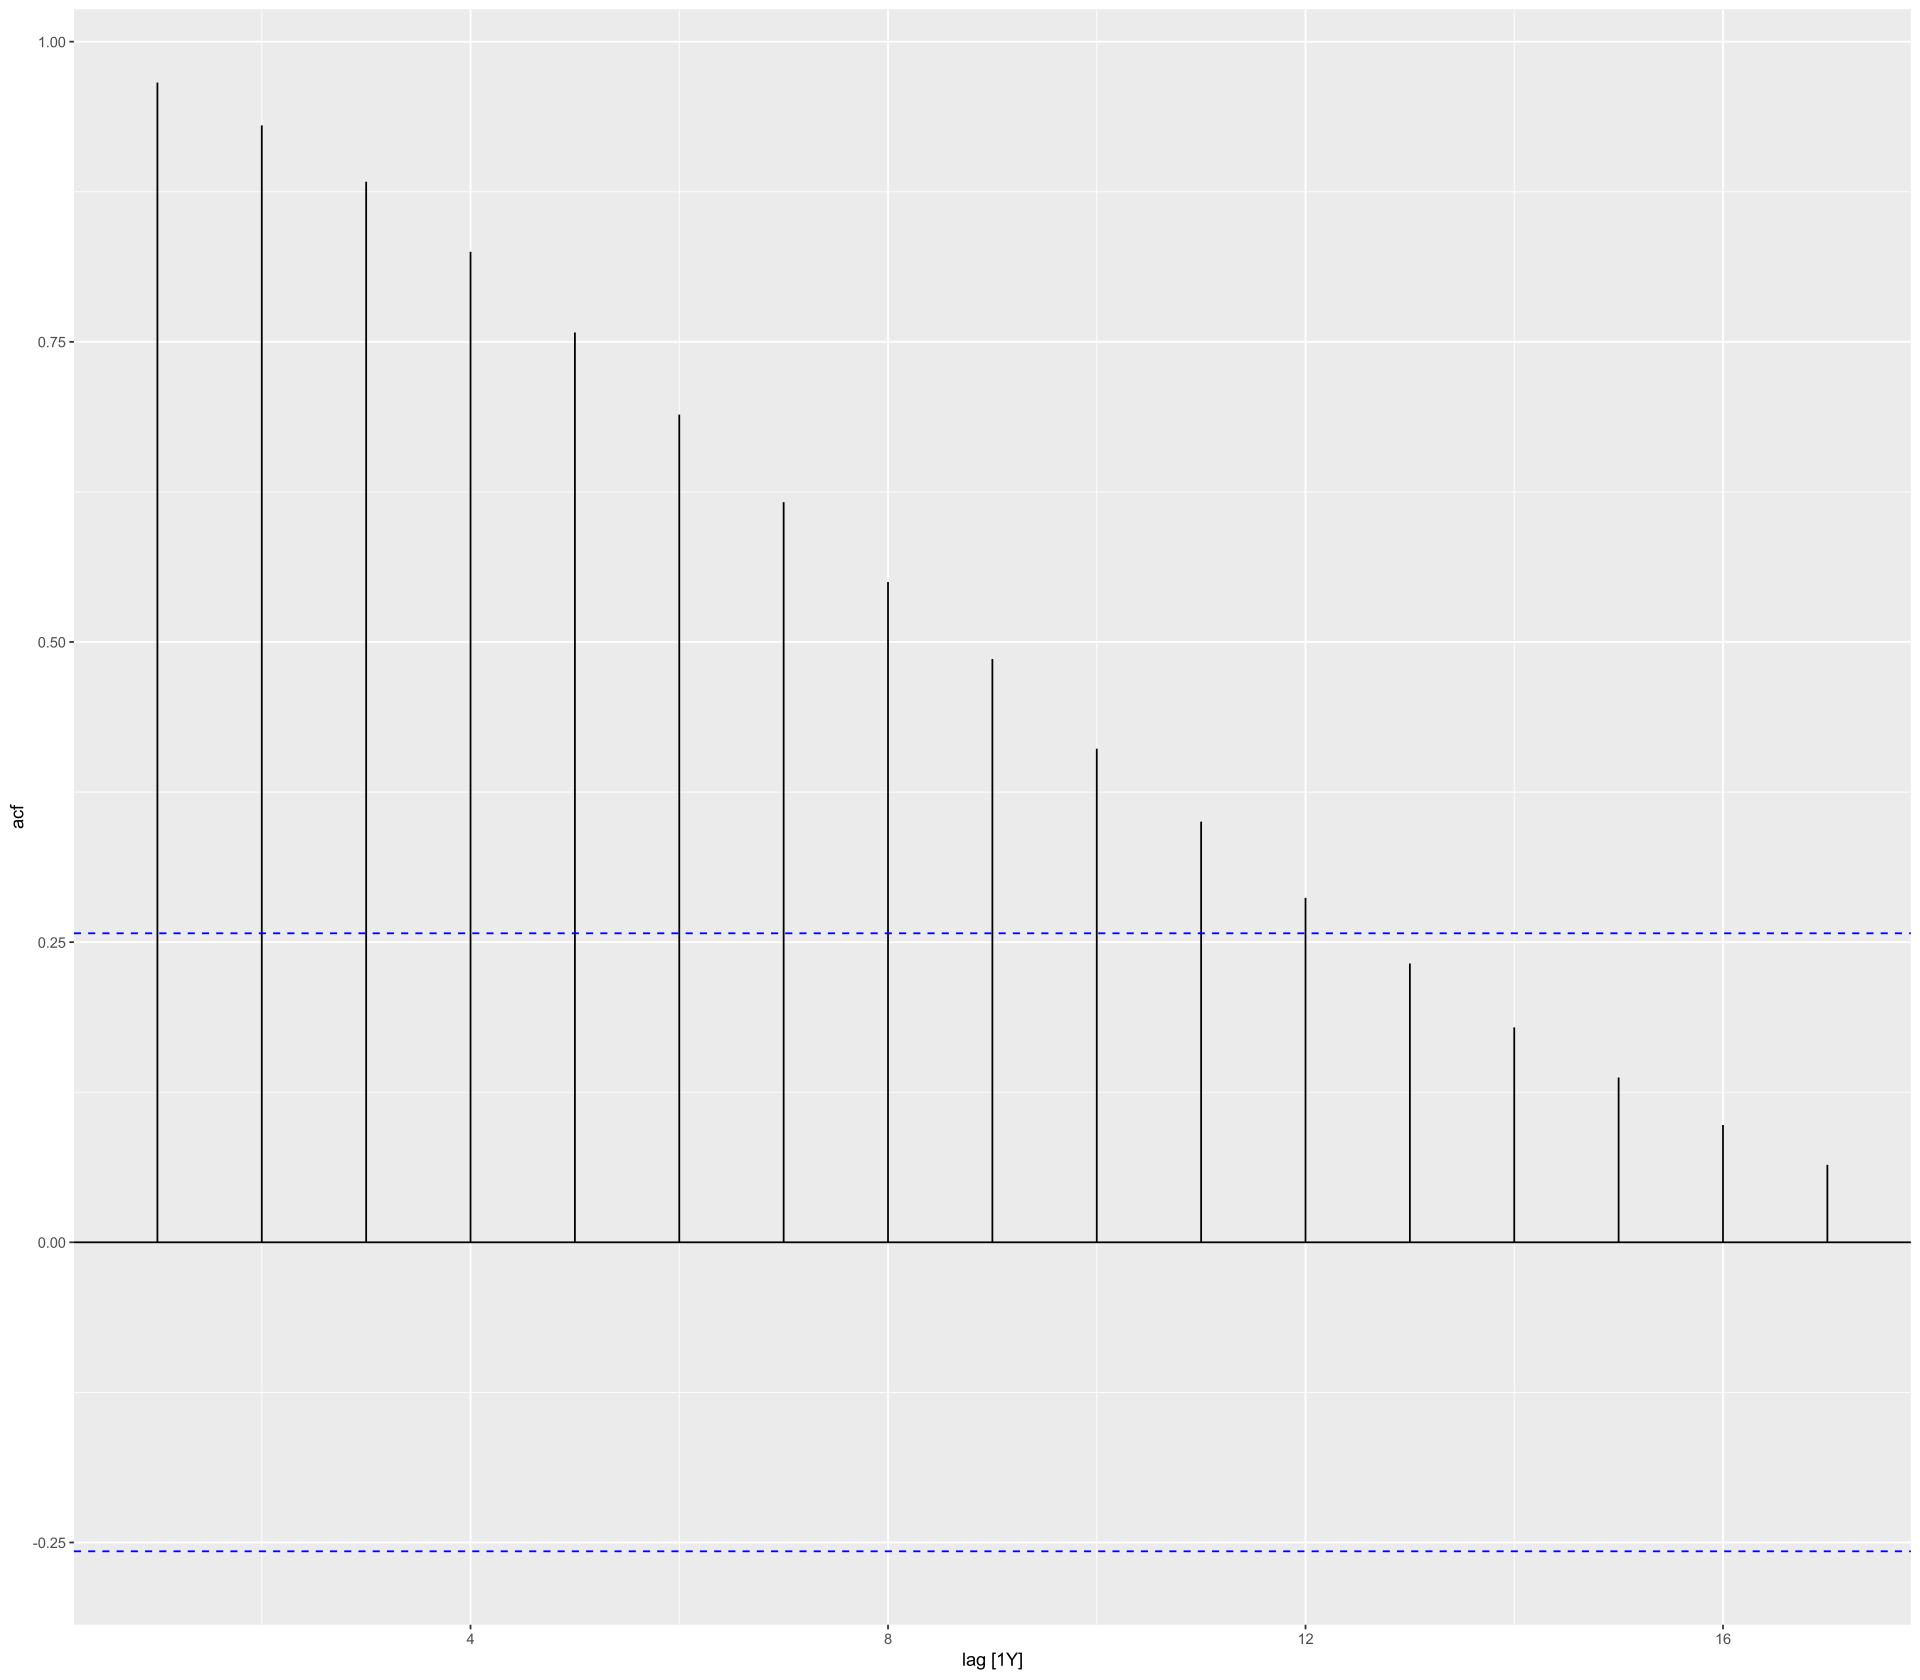

In [17]:
global_economy|>filter(Code == "IND")|>ACF(Exports)|>autoplot()

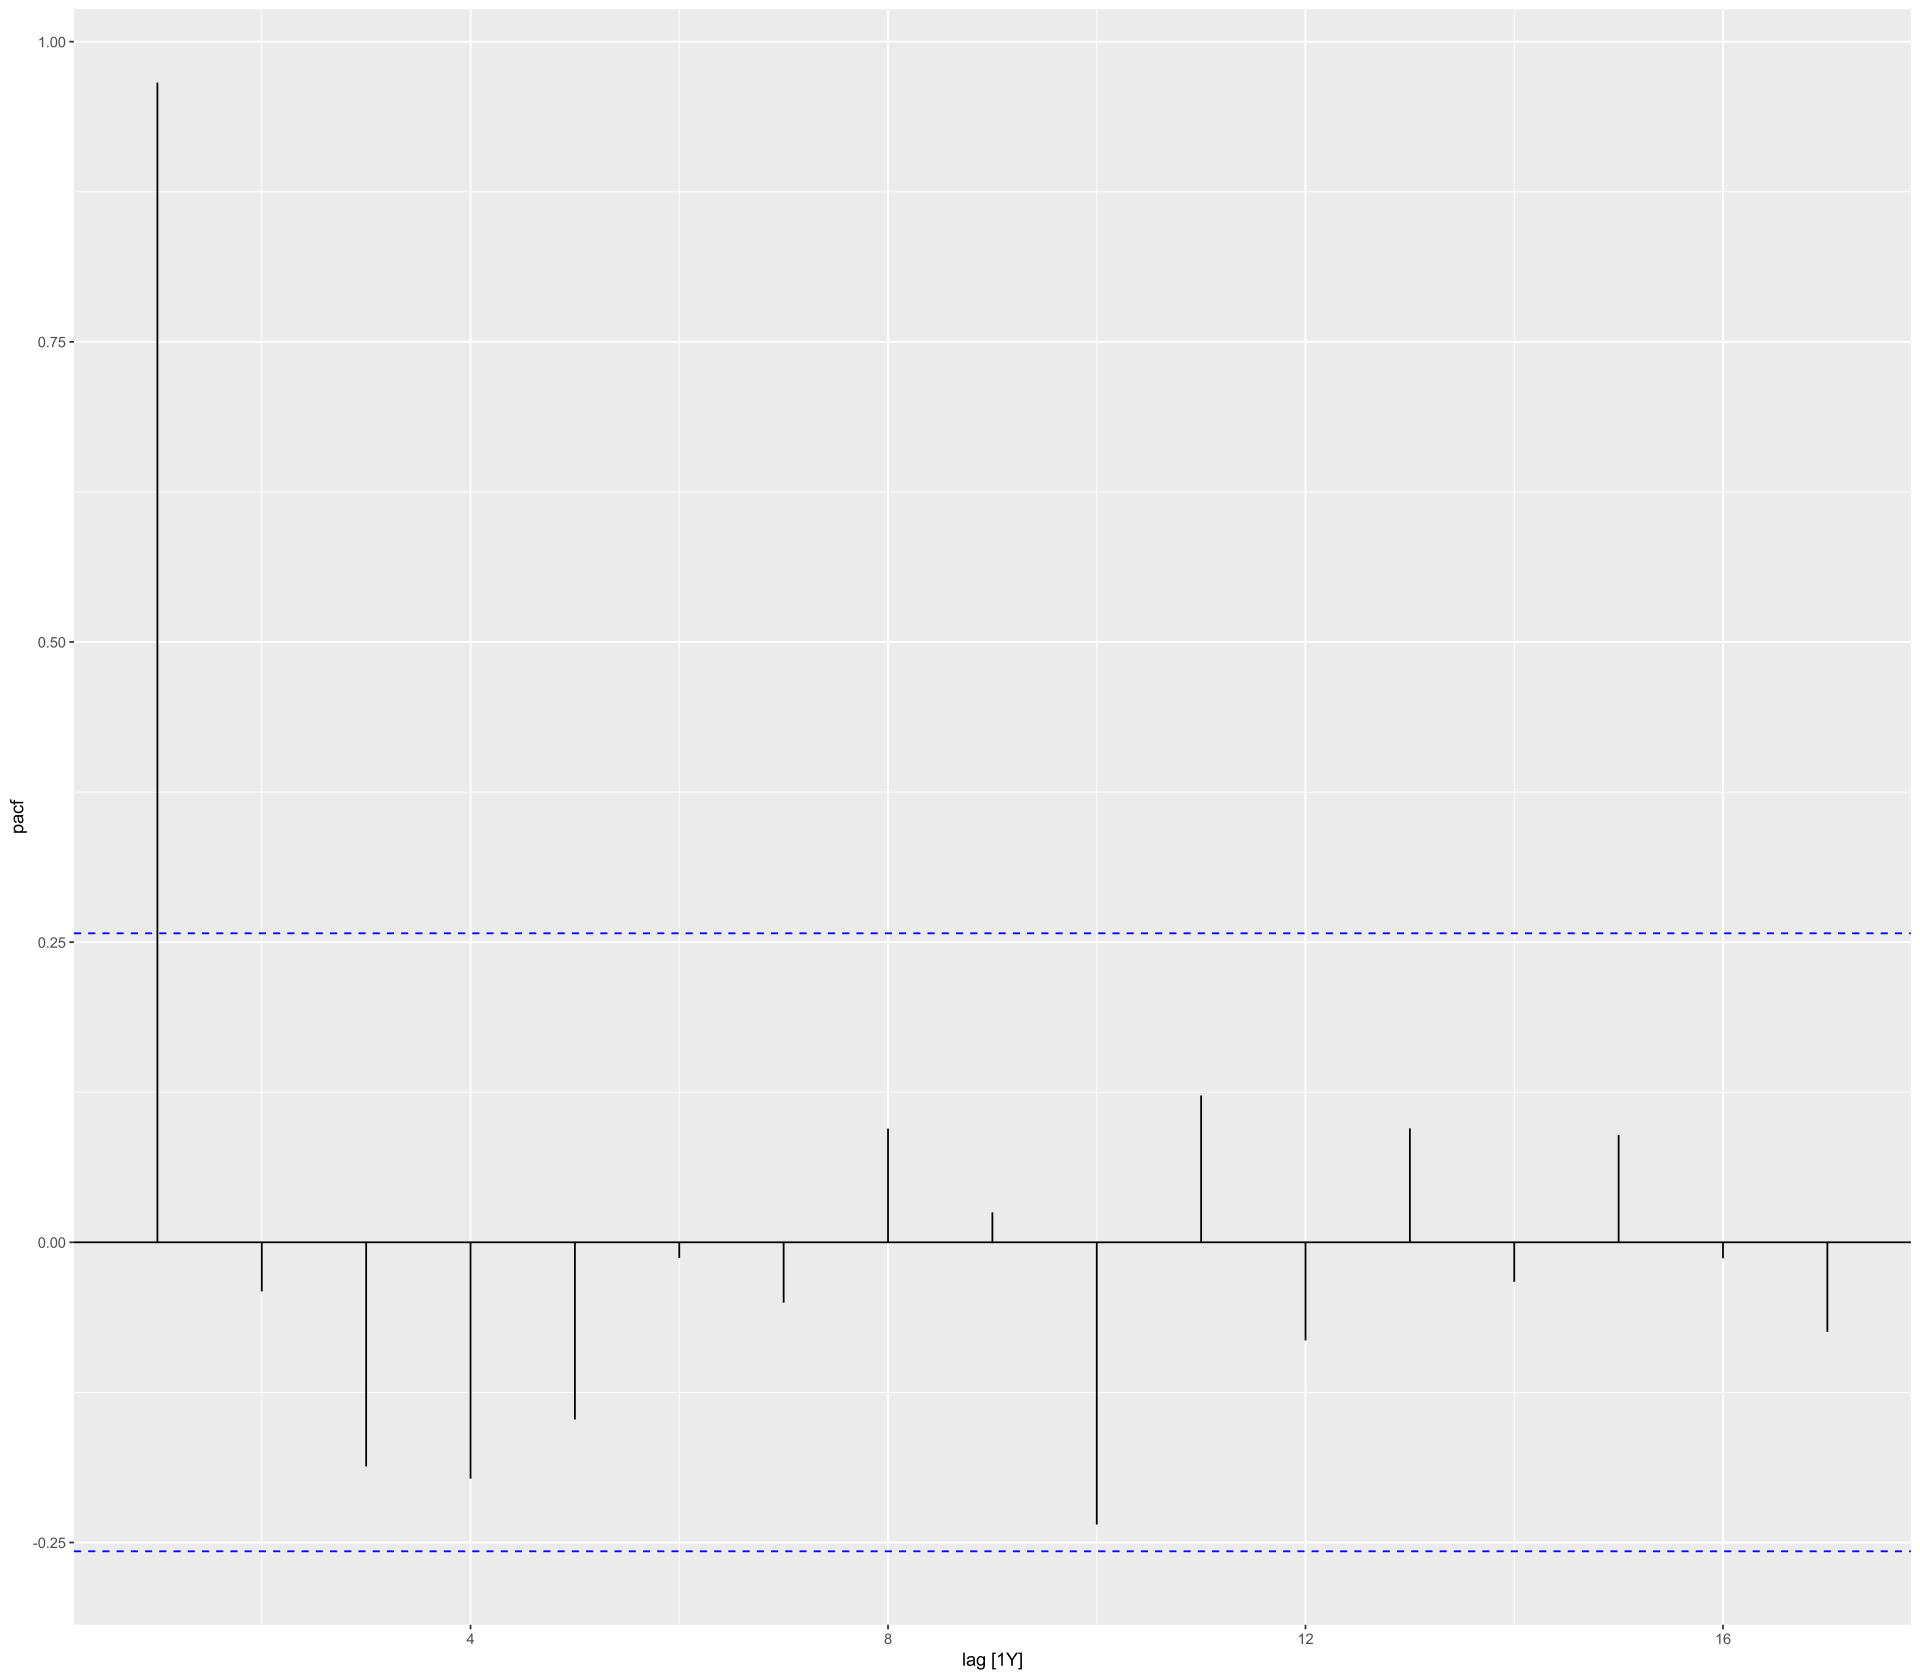

In [18]:
global_economy |>filter(Code == "IND")|>PACF(Exports)|>autoplot()

In [22]:
# Check if the package is installed
if (!requireNamespace("urca", quietly = TRUE)) {
  # If not installed, install it
  install.packages("urca")
} else {
  # If installed, load the package
  library(urca)
}


Warning message in install.packages("urca"):
“installation of package ‘urca’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [26]:
library("tseries")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [29]:
ARIMA(global_economy|>filter(Code == "IND"), order = c(1,1,1))
adf.test(global_economy|>filter(Code == "IND"), y=Exports)

<ARIMA model definition>

ERROR: Error in adf.test(filter(global_economy, Code == "IND"), y = Exports): unused argument (y = Exports)


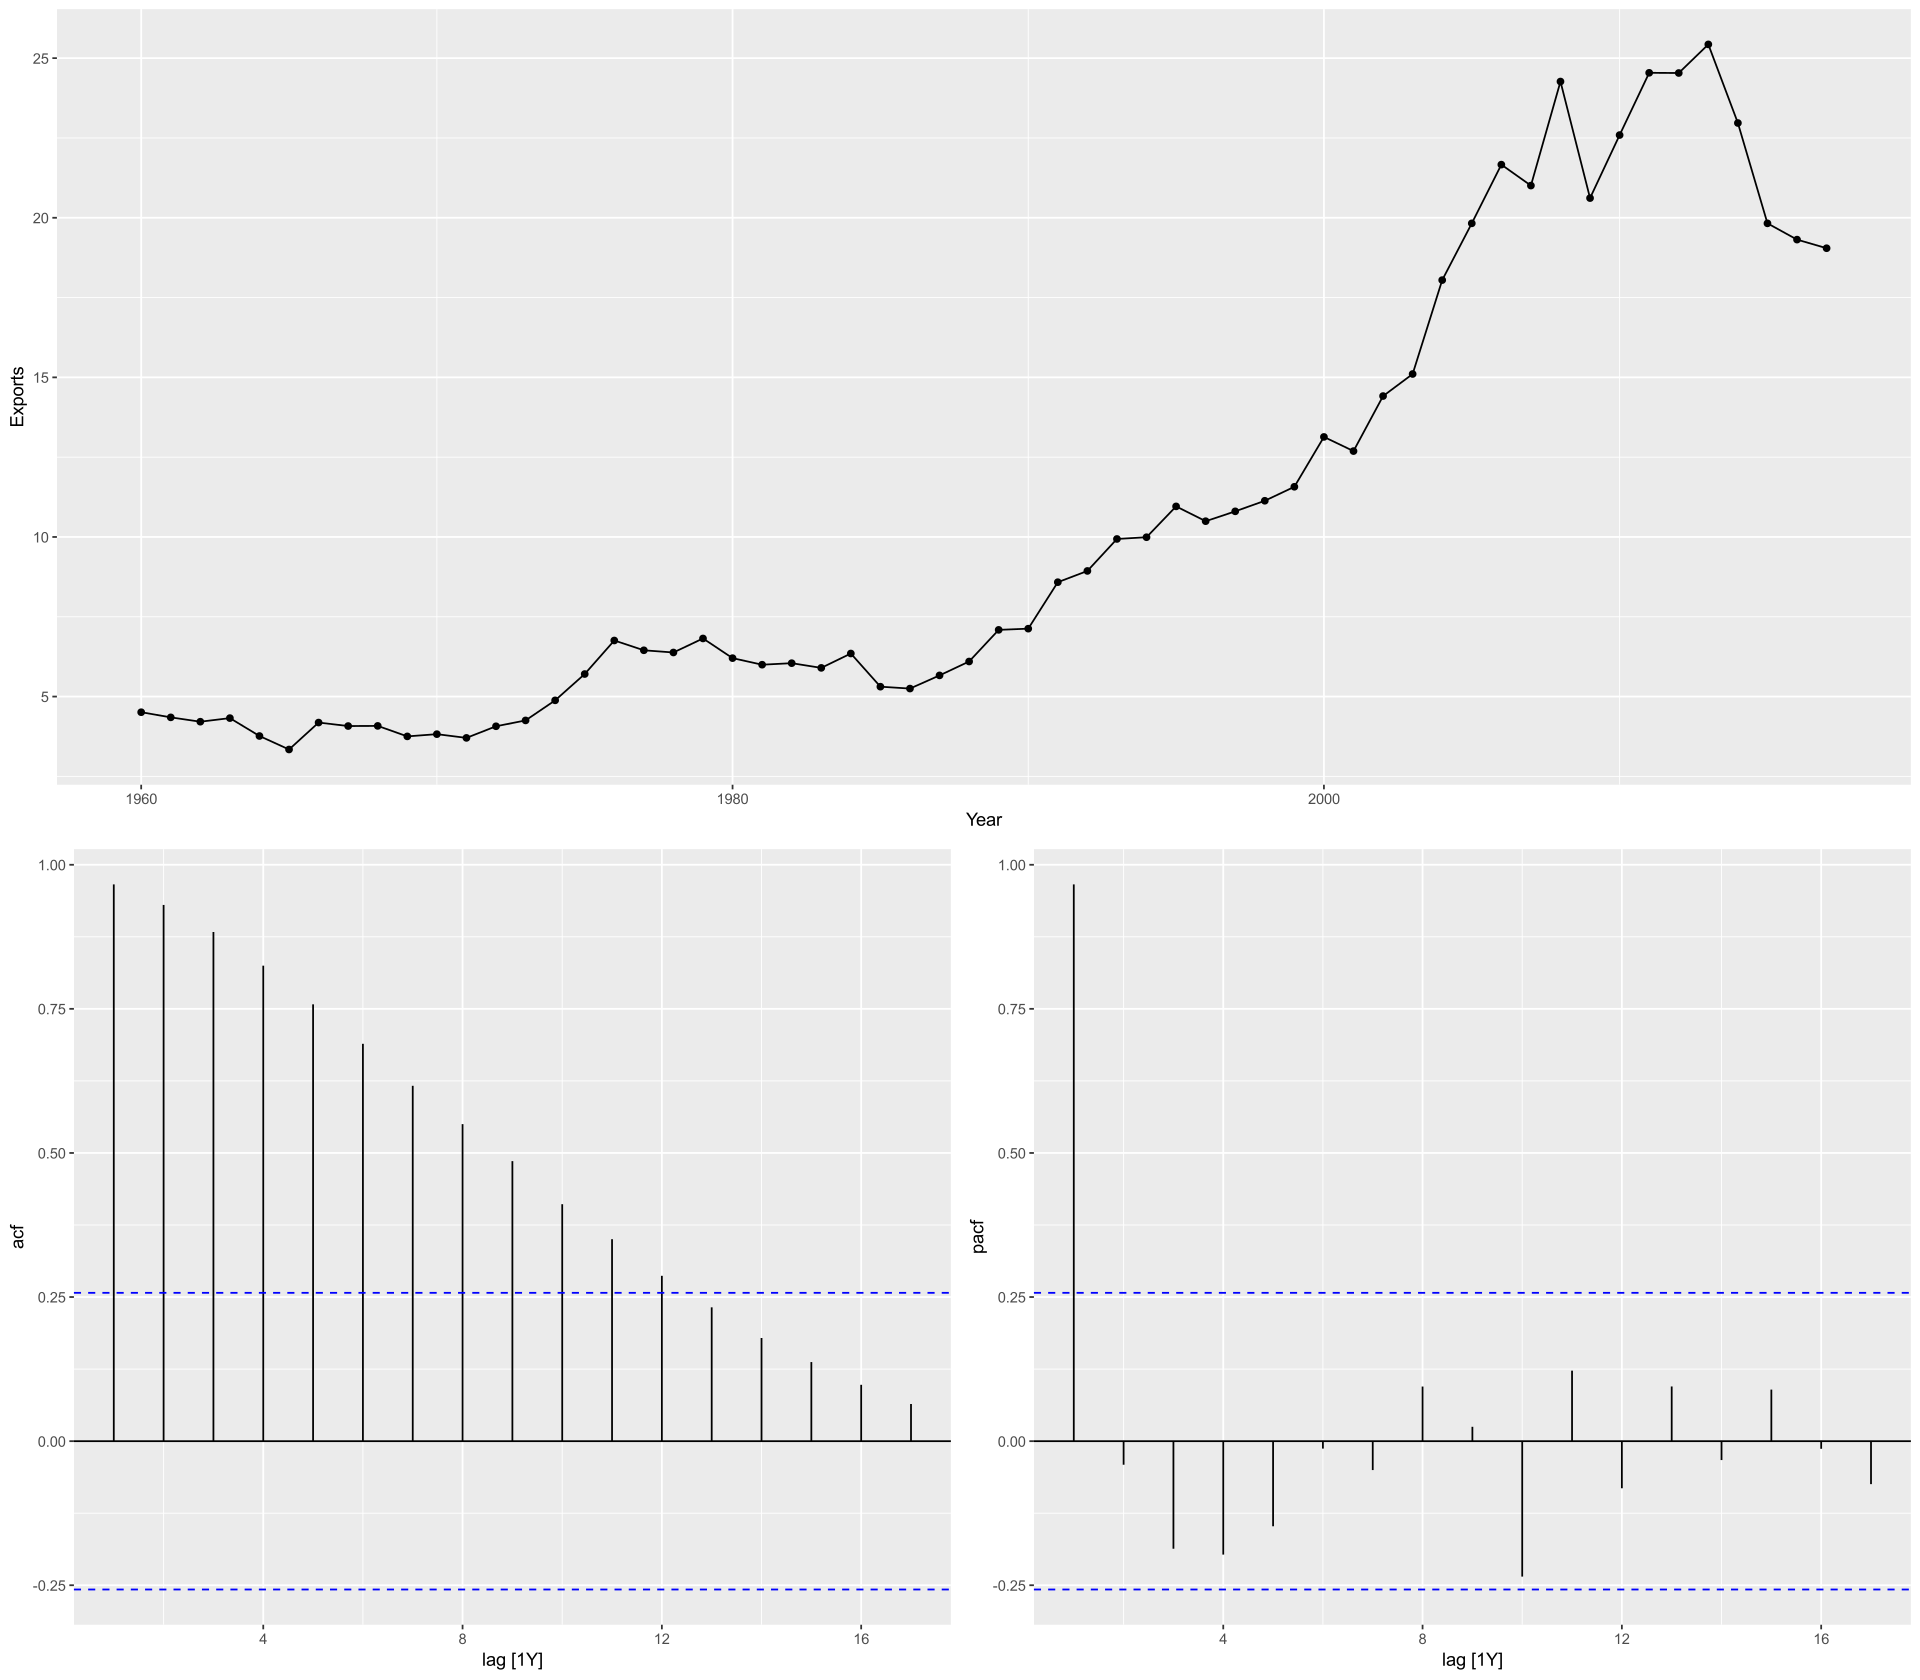

In [21]:
gg_tsdisplay(global_economy|>filter(Code == "IND"),y = Exports, plot_type = "partial")

In [30]:
# Key points about the ACF and PACF from the above plots

# The data may follow an ARIMA(p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

# The ACF is exponentially decaying or sinusoidal
# Ther is a significant spike at lag p in the PACF, but noen beyond lag p.

# The data may follow an ARIMA(0,d,q) model if the ACF and PACF plots of the differenced data show the following patterns:

# The ACF is exponentially decaying or sinusoidal
# There is a significant spike at lag q in the PACF, but none beyond lag q.


#

In [44]:
fit2 <- global_economy |> filter(Code == "IND") |> model(ARIMA(Exports ~ pdq(0,2,1)))

In [45]:
fit2

Country,"ARIMA(Exports ~ pdq(0, 2, 1))"
<fct>,<model>
India,"<ARIMA(0,2,1)>"


In [46]:
report(fit2)

Series: Exports 
Model: ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.8621
s.e.   0.1254

sigma^2 estimated as 1.491:  log likelihood=-90.83
AIC=185.65   AICc=185.88   BIC=189.7


In [53]:
# We can also find the best ARIMA model with p {1,2,3,4}, q {0,1,2} and d=1, we can use


fit3 <- global_economy|>filter(Code == 'IND') |>model(ARIMA(Exports ~ pdq( p=1:3, d=1, q=0:2)))

In [54]:
report(fit3)

Series: Exports 
Model: ARIMA(2,1,0) 

Coefficients:
         ar1     ar2
      0.0100  0.3118
s.e.  0.1234  0.1231

sigma^2 estimated as 1.342:  log likelihood=-88.35
AIC=182.71   AICc=183.16   BIC=188.84


In [55]:
fit3 -> forecast(h=10)

ERROR: Error in forecast(h = 10) <- fit3: target of assignment expands to non-language object
